In [68]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,
                             roc_auc_score, roc_curve, confusion_matrix, classification_report)

In [3]:
df = pd.read_csv('retail_customer_dataset.csv')
df.head()

,CustomerID,Age,Gender,AnnualIncome,TotalPurchases,AvgTransactionValue,VisitsPerMonth,OnlineUser,MembershipLevel,Churned
0,10001,56,Female,2499782,38,36731.30,10,0,Bronze,0
1,10002,69,Other,1771801,32,13679.74,9,0,Gold,0
2,10003,46,Other,2218391,20,22596.08,13,1,Silver,0
3,10004,32,Male,868875,48,44191.71,3,1,Platinum,1
4,10005,60,Male,795983,2,48536.46,3,0,Gold,1


In [5]:
df.shape

(4000, 10)

In [6]:
df.isnull().sum()

CustomerID             0
Age                    0
Gender                 0
AnnualIncome           0
TotalPurchases         0
AvgTransactionValue    0
VisitsPerMonth         0
OnlineUser             0
MembershipLevel        0
Churned                0
dtype: int64

In [9]:
df.isnull().values.any()

False

In [63]:
df.dtypes

CustomerID               int64
Age                      int64
Gender                  object
AnnualIncome             int64
TotalPurchases           int64
AvgTransactionValue    float64
VisitsPerMonth           int64
OnlineUser               int64
MembershipLevel         object
Churned                  int64
dtype: object

In [40]:
df.describe()

,CustomerID,Age,AnnualIncome,TotalPurchases,AvgTransactionValue,VisitsPerMonth,OnlineUser,Churned
count,4000.000000,4000.000000,4.000000e+03,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,12000.500000,43.696250,1.351867e+06,25.053000,25336.801300,10.022250,0.502000,0.489000
std,1154.844867,14.936792,6.618983e+05,14.106911,14251.256125,5.493205,0.500059,0.499941
min,10001.000000,18.000000,2.000370e+05,1.000000,305.900000,1.000000,0.000000,0.000000
25%,11000.750000,31.000000,7.869192e+05,13.000000,13109.597500,5.000000,0.000000,0.000000
50%,12000.500000,44.000000,1.353334e+06,25.000000,25513.760000,10.000000,1.000000,0.000000
75%,13000.250000,56.000000,1.920692e+06,37.250000,37565.287500,15.000000,1.000000,1.000000
max,14000.000000,69.000000,2.499782e+06,49.000000,49994.670000,19.000000,1.000000,1.000000


## Section1: EDA
How many rows and columns does the dataset contain?
Are there any missing values?
What is the distribution of the target variable Churned?
What is the average age and income of the customers?
How many male vs. female customers are there?
Does the churn rate differ across Membership Levels?
Is there a relationship between VisitsPerMonth and Churned?
Plot correlation heatmap for numerical variables.
Which variable seems most strongly correlated with churn?
Are OnlineUsers more likely to churn?

In [10]:
df['Churned'].value_counts(normalize=True)

0    0.511
1    0.489
Name: Churned, dtype: float64

In [18]:
print("\n AVG Age:")
df['Age'].mean()


 AVG Age:


43.69625

In [19]:
print("\n AVG Annualincome:")
df['AnnualIncome'].mean()


 AVG Annualincome:


1351866.7995

In [24]:
df['Gender'].value_counts()

Female    1345
Other     1340
Male      1315
Name: Gender, dtype: int64

In [25]:
df['MembershipLevel'].unique()

array(['Bronze', 'Gold', 'Silver', 'Platinum'], dtype=object)

In [26]:
df.groupby('MembershipLevel')['Churned'].value_counts()

MembershipLevel  Churned
Bronze           0          553
                 1          541
Gold             0          495
                 1          467
Platinum         0          517
                 1          488
Silver           0          479
                 1          460
Name: Churned, dtype: int64

<AxesSubplot:xlabel='MembershipLevel'>

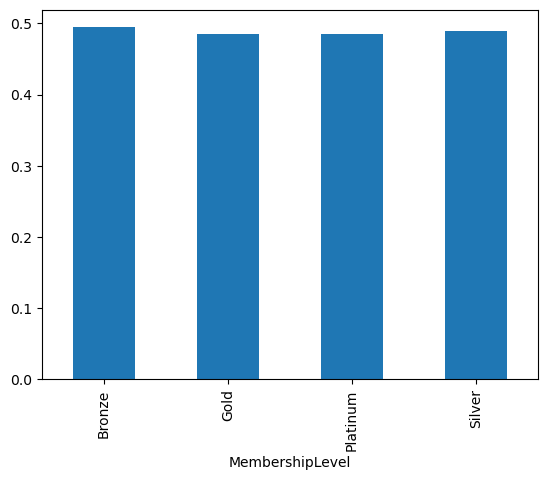

In [30]:
df.groupby('MembershipLevel')['Churned'].mean().plot(kind='bar')

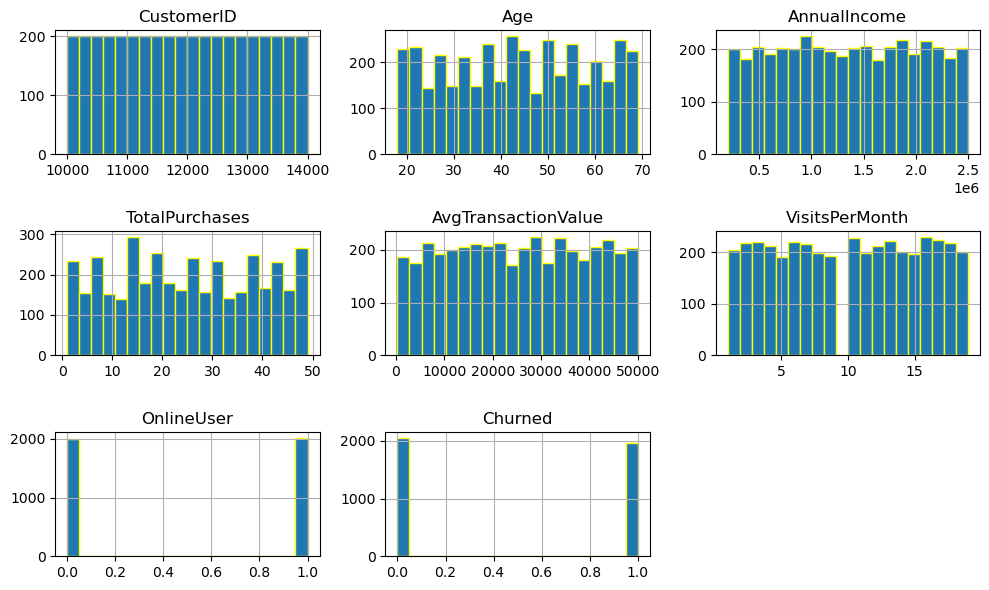

In [31]:
df.hist(figsize=(10,6), bins=20, edgecolor='yellow')
plt.tight_layout()
plt.show()

In [33]:
df.groupby('Churned')['VisitsPerMonth'].mean()

Churned
0    10.011742
1    10.033231
Name: VisitsPerMonth, dtype: float64

<AxesSubplot:xlabel='Churned', ylabel='VisitsPerMonth'>

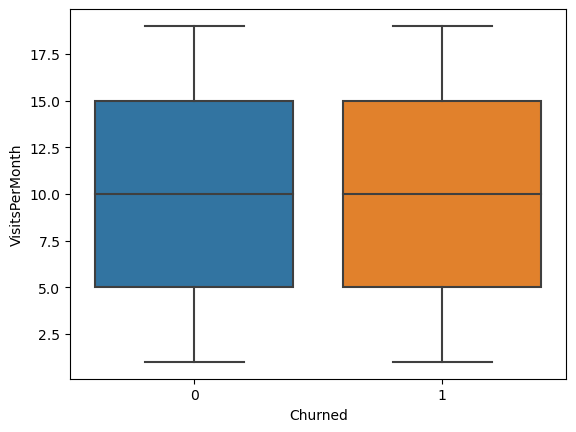

In [37]:
sns.boxplot(x='Churned', y='VisitsPerMonth', data=df)

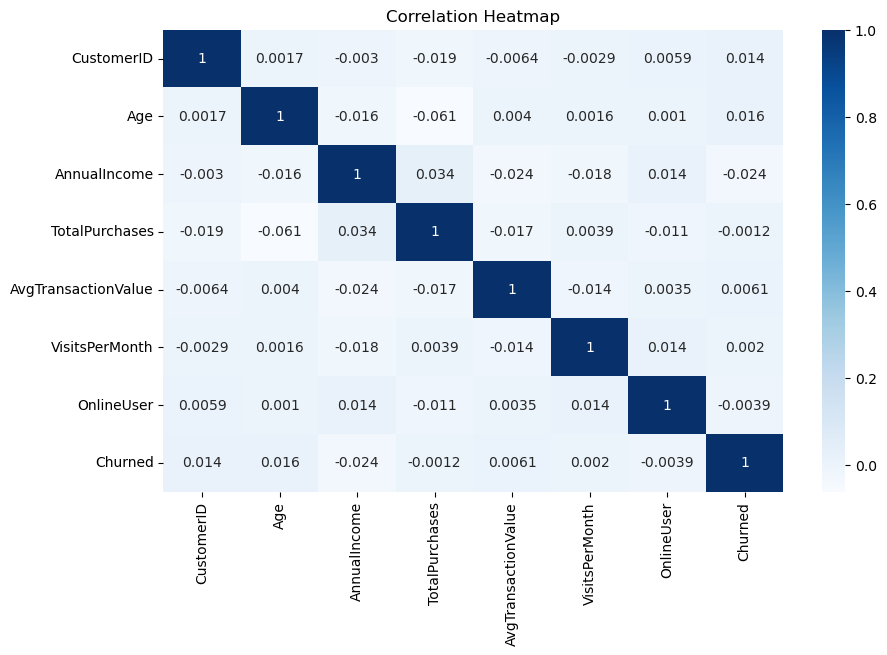

In [38]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap="Blues")
plt.title("Correlation Heatmap")
plt.show()

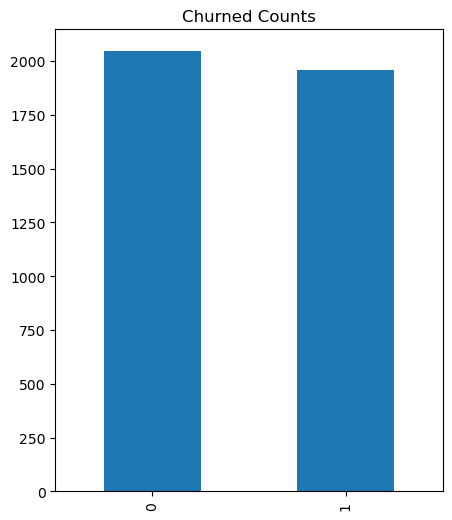

In [43]:
plt.figure(figsize=(5,6))
df['Churned'].value_counts().plot(kind='bar')
plt.title('Churned Counts')
plt.show()

In [41]:
df.groupby('OnlineUser')['Churned'].value_counts()

OnlineUser  Churned
0           0          1014
            1           978
1           0          1030
            1           978
Name: Churned, dtype: int64

In [64]:
df.head()

,CustomerID,Age,Gender,AnnualIncome,TotalPurchases,AvgTransactionValue,VisitsPerMonth,OnlineUser,MembershipLevel,Churned
0,10001,56,Female,2499782,38,36731.30,10,0,Bronze,0
1,10002,69,Other,1771801,32,13679.74,9,0,Gold,0
2,10003,46,Other,2218391,20,22596.08,13,1,Silver,0
3,10004,32,Male,868875,48,44191.71,3,1,Platinum,1
4,10005,60,Male,795983,2,48536.46,3,0,Gold,1


In [72]:
X = df.drop('Churned', axis=1)
y = df['Churned']

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [76]:
# Baseline logistic regression with default hyperparameters
model_pipeline = Pipeline([
    ('preprocessing', preprocessor),
    ('clf', LogisticRegression(random_state=42, max_iter=1000))])

model_pipeline.fit(X_train, y_train)

y_pred = model_pipeline.predict(X_test)
y_prob = model_pipeline.predict_proba(X_test)[:, 1]

print("\nBaseline model evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1:", f1_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_prob))
print("\nClassification report:\n", classification_report(y_test, y_pred))


Baseline model evaluation:
Accuracy: 0.48
Precision: 0.4369747899159664
Recall: 0.42048517520215634
F1: 0.42857142857142855
ROC AUC: 0.4544323600927374

Classification report:
               precision    recall  f1-score   support

           0       0.51      0.53      0.52       429
           1       0.44      0.42      0.43       371

    accuracy                           0.48       800
   macro avg       0.48      0.48      0.48       800
weighted avg       0.48      0.48      0.48       800



In [78]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[228 201]
 [215 156]]


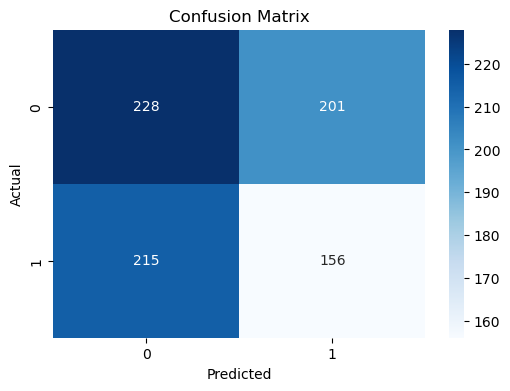

In [79]:
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [80]:
import pickle

# Save the trained model
pickle.dump(model_pipeline, open("Retail_customer_churned_data_model.pkl", "wb"))

print("Model saved as Retail_customer_churned_data_model.pkl")

Model saved as Retail_customer_churned_data_model.pkl
